In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("data_800.csv")

In [5]:
df.head()

,province,814,835,851
0,20250530,5530847.0,4054314.0,1263347
1,20250531,5080310.0,NaN,1229588
2,20250601,4881822.0,NaN,1108290
3,20250602,4761905.0,3204157.0,1056297
4,20250603,4783229.0,NaN,1003795


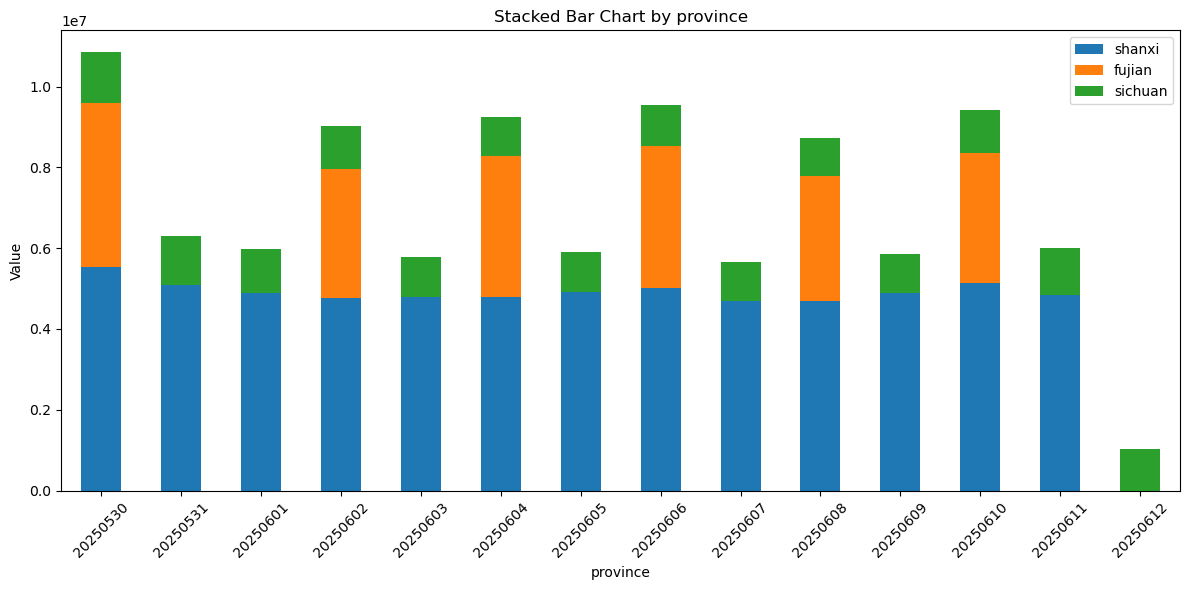

In [7]:
import matplotlib.pyplot as plt

# 设置province为横坐标，其他列为堆叠数据
df_plot = df.set_index('province')[['814', '835', '851']].rename(columns={'814': 'shanxi', '835': 'fujian', '851': 'sichuan'})

# 绘制堆叠直方图
df_plot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('province')
plt.ylabel('Value')
plt.title('Stacked Bar Chart by province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
df.head()

,p_date,new,old
0,20250501,563233,652079
1,20250502,551023,652796
2,20250503,549613,672625
3,20250504,542378,683118
4,20250505,535207,697586


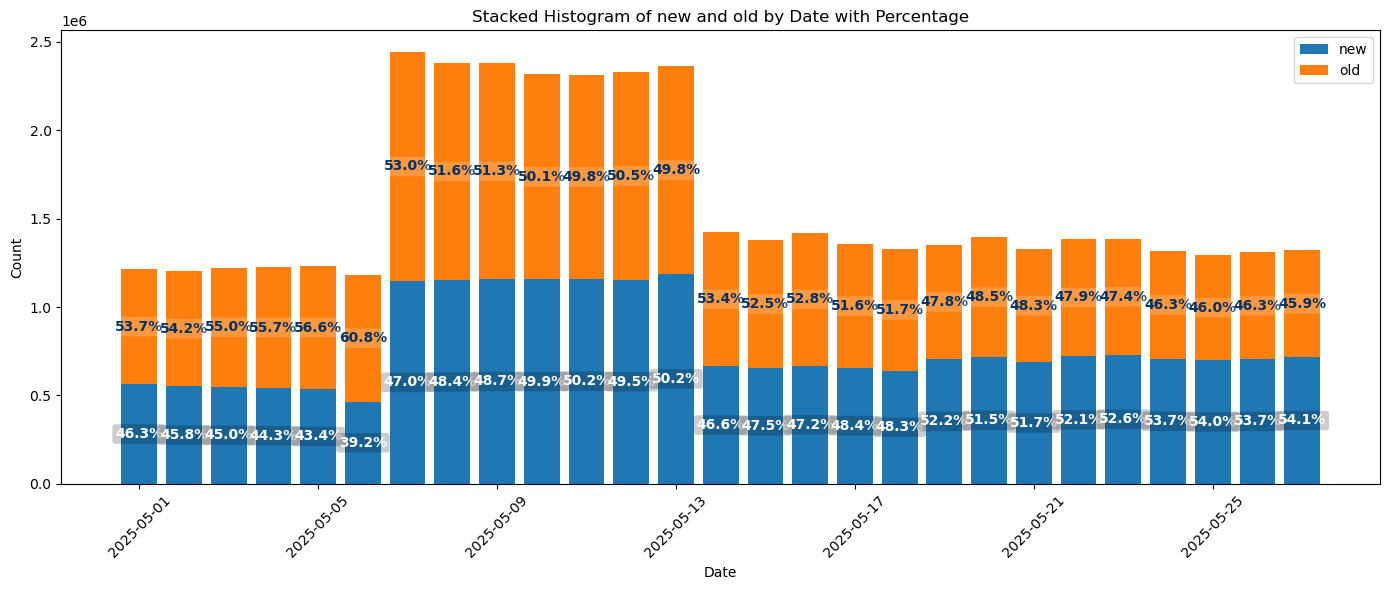

In [5]:
import matplotlib.pyplot as plt

# 转换日期格式
df['p_date'] = pd.to_datetime(df['p_date'], format='%Y%m%d')

# 计算总量和百分比
df['total'] = df['new'] + df['old']
df['new_pct'] = df['new'] / df['total'] * 100
df['old_pct'] = df['old'] / df['total'] * 100

fig, ax = plt.subplots(figsize=(14, 6))

# 堆叠直方图
bars_new = ax.bar(df['p_date'], df['new'], label='new')
bars_old = ax.bar(df['p_date'], df['old'], bottom=df['new'], label='old')

# 标注百分比
for i, (new, old, total) in enumerate(zip(df['new'], df['old'], df['total'])):
    # 新用户百分比（白色、加粗、稍大字体）
    ax.text(
        df['p_date'].iloc[i], new / 2,
        f"{df['new_pct'].iloc[i]:.1f}%",
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold', fontfamily='sans-serif',
        bbox=dict(facecolor='black', alpha=0.2, edgecolor='none', boxstyle='round,pad=0.2')
    )
    # 老用户百分比（深蓝色、加粗、稍大字体）
    ax.text(
        df['p_date'].iloc[i], new + old / 2,
        f"{df['old_pct'].iloc[i]:.1f}%",
        ha='center', va='center',
        color='#003366', fontsize=10, fontweight='bold', fontfamily='sans-serif',
        bbox=dict(facecolor='white', alpha=0.2, edgecolor='none', boxstyle='round,pad=0.2')
    )

ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Stacked Histogram of new and old by Date with Percentage')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()